In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
wine_data=pd.read_csv("C:\\Users\\user\\jupyter_notebook\\ML2022_HW1\\X.csv")
wine_target=pd.read_csv("C:\\Users\\user\\jupyter_notebook\\ML2022_HW1\\T.csv")

In [4]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
wine_features=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

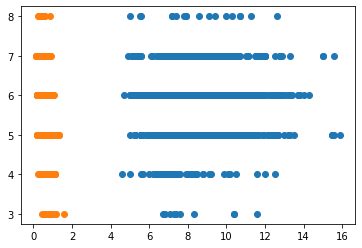

In [6]:
X=wine_data[wine_features]
Y=wine_target["quality"]
#plt.subplot(2,2,1)
plt.scatter(X["fixed acidity"],Y)
plt.scatter(X["volatile acidity"],Y)

In [7]:
"""
sklearn.linear_model  linear
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
X_trans=np.transpose(X)
tmp=np.linalg.inv(np.matmul(X_trans,X))
W=np.matmul(np.matmul(tmp,X_trans),y)
model_reg=linear()
model_reg.fit(X,y)
print(W)
#print(model)
"""

'\nsklearn.linear_model  linear\nX = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])\ny = np.dot(X, np.array([1, 2])) + 3\nX_trans=np.transpose(X)\ntmp=np.linalg.inv(np.matmul(X_trans,X))\nW=np.matmul(np.matmul(tmp,X_trans),y)\nmodel_reg=linear()\nmodel_reg.fit(X,y)\nprint(W)\n#print(model)\n'

In [9]:
def predict(W0,W1,x):
    return np.matmul(W1,x)+W0
def regression_M1(X,Y):#without intercept
    X_numpy=X.to_numpy()  #for pandas.dataframe to numpy.ndarray
    
    N=len(X_numpy)
    ones=np.array([[1]])
    for i in range(N-1):
        ones=np.append(ones,[1])
    ones=np.resize(ones,(N,1))
    X_numpy=np.append(X_numpy,ones,1)
    
    #print(X_numpy[0])
    Y_numpy=Y.to_numpy()
    X_trans=np.transpose(X_numpy)
    tmp=np.linalg.inv(np.matmul(X_trans,X_numpy))
    W=np.matmul(np.matmul(tmp,X_trans),Y_numpy)
    
    intercept=W[-1]
    W=np.delete(W,-1)
    return intercept, W
def Error(W0,W1,X,Y):
    count=0
    N=Y.size
    
    X_numpy=X.to_numpy()#for pandas.dataframe to numpy.ndarray
    Y_numpy=Y.to_numpy()
    
    for i in range(N):
        tmp=predict(W0,W1,X_numpy[i])-Y_numpy[i]
        count+=tmp*tmp
    return count/(2*N)
#X_numpy=X.to_numpy()
#Y_numpy=Y.to_numpy()

W0, W1=regression_M1(X,Y)

reg_model=LinearRegression().fit(X,Y)

#print
print(W0,W1)
print(reg_model.coef_)
#print(np.matmul(X_numpy,W1))
#print(reg_model.predict(X))

print(Error(W0,W1,X,Y))
print(Error(reg_model.intercept_,reg_model.coef_,X,Y))

21.965208427935067 [ 2.49905527e-02 -1.08359026e+00 -1.82563950e-01  1.63312698e-02
 -1.87422516e+00  4.36133330e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
[ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
0.2083835836106249
0.20838358361062534
